In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_loc = '/Users/simon/Documents/DTU/9. semester/deep learning/data'

measurements_all = [pd.read_csv(os.path.join(data_loc, f'Case{case}',f'Proj_Measurements_Case{case}.csv')) for case in (1,2,3)]
nwp_all = [pd.read_csv(os.path.join(data_loc, f'Case{case}',f'Proj_NWP_Case{case}.csv')) for case in (1,2,3)]

df_all = measurements_all+nwp_all

for i in range(3):
    measurements_all[i].name = f'Measurement {i+1}'
    nwp_all[i].name = f'NWP {i+1}'
    
for df in df_all:
    df['Date_Time'] = pd.to_datetime(df['Date_Time'])
    for name in df.columns:
        if name != 'Date_Time':
            df[name]=df[name].astype('float64')


    

In [3]:
for df in df_all:
    print('\n\nDataframe: ',df.name)
    print(f'Number of rows: {len(df.index)}. Memory usage: {df.memory_usage().sum()/1048576:.2f} MB.')
    print('\nMinimum time difference:', df['Date_Time'].diff().min())
    print('Maximum time difference:', df['Date_Time'].diff().max())
    print(f'Start time: {df["Date_Time"].min()}. End time: {df["Date_Time"].max()}. \nTotal time difference: {df["Date_Time"].max()-df["Date_Time"].min()}')
    
    summary=pd.concat((df.dtypes, df.isna().sum(), df.describe(datetime_is_numeric=True).transpose()), axis=1)
    summary.rename({0: 'Dtype', 1: 'Null count'}, axis=1, inplace=True)
    summary.loc['Date_Time','mean']=summary.loc['Date_Time','mean'].round('min')
    
    display(summary)

    





Dataframe:  Measurement 1
Number of rows: 147205. Memory usage: 13.48 MB.

Minimum time difference: 0 days 00:15:00
Maximum time difference: 0 days 00:15:00
Start time: 2017-01-07 20:15:00. End time: 2021-03-21 05:15:00. 
Total time difference: 1533 days 09:00:00


,Dtype,Null count,count,mean,min,25%,50%,75%,max,std
Date_Time,datetime64[ns],0,147205,2019-02-13 12:45:00,2017-01-07 20:15:00,2018-01-26 04:30:00,2019-02-13 12:45:00,2020-03-02 21:00:00,2021-03-21 05:15:00,NaN
Speed_10m,float64,475,146730.0,3.223092,0.0,0.067,1.6,5.2,23.967,3.951957
Direction_10m,float64,475,146730.0,197.287962,0.0,170.0,217.4,246.0,360.0,79.243239
Speed_30m,float64,475,146730.0,6.542762,0.0,3.667,5.667,8.667,27.167,3.906181
Direction_30m,float64,475,146730.0,201.393653,0.0,167.8,230.0,248.6,360.0,79.225843
Speed_65m,float64,475,146730.0,5.442744,0.0,0.767,4.9,8.467,32.167,4.709219
Direction_65m,float64,475,146730.0,203.584827,0.0,163.6,226.3,254.9,360.0,83.881323
Speed_70m,float64,475,146730.0,7.031156,0.0,3.967,6.433,9.5,28.4,4.188691
Direction_70m,float64,475,146730.0,188.332053,0.0,149.9,203.0,225.7,360.0,75.969289
Speed_80m,float64,107433,39772.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




Dataframe:  Measurement 2
Number of rows: 174927. Memory usage: 13.35 MB.

Minimum time difference: 0 days 00:15:00
Maximum time difference: 0 days 00:15:00
Start time: 2016-01-01 00:00:00. End time: 2020-12-27 03:30:00. 
Total time difference: 1822 days 03:30:00


,Dtype,Null count,count,mean,min,25%,50%,75%,max,std
Date_Time,datetime64[ns],0,174927,2018-06-30 01:45:00,2016-01-01 00:00:00,2017-03-31 12:52:30,2018-06-30 01:45:00,2019-09-28 14:37:30,2020-12-27 03:30:00,NaN
Speed_10m,float64,7524,167403.0,2.250325,0.0,0.533,1.926,3.346,15.6,2.00614
Direction_10m,float64,7524,167403.0,209.632154,0.0,158.6,206.3,273.3,360.0,79.32224
Speed_30m,float64,7524,167403.0,4.591542,0.0,2.595,4.065,6.065,22.133,2.900411
Direction_30m,float64,7524,167403.0,208.216658,0.0,155.1,216.5,271.1,359.9,77.893663
Speed_65m,float64,7524,167403.0,5.568522,0.0,3.277,5.1,7.411,25.0,3.275695
Direction_65m,float64,7524,167403.0,208.06772,0.0,166.9,211.8,271.2,360.0,77.638411
Speed_70m,float64,10500,164427.0,5.246556,0.0,2.733,4.873,7.391,24.033,3.599624
Direction_70m,float64,10500,164427.0,198.196066,0.0,145.1,206.1,275.2,360.0,95.621154
Park Power [KW],float64,2482,172445.0,22322.760486,-49.0,1190.0,10658.0,34639.0,100671.0,26846.601053




Dataframe:  Measurement 3
Number of rows: 118382. Memory usage: 9.03 MB.

Minimum time difference: 0 days 00:15:00
Maximum time difference: 0 days 00:15:00
Start time: 2017-05-01 00:00:00. End time: 2020-09-15 03:15:00. 
Total time difference: 1233 days 03:15:00


,Dtype,Null count,count,mean,min,25%,50%,75%,max,std
Date_Time,datetime64[ns],0,118382,2019-01-07 13:38:00,2017-05-01 00:00:00,2018-03-05 06:48:45,2019-01-07 13:37:30,2019-11-11 20:26:15,2020-09-15 03:15:00,NaN
Speed_10m,float64,1516,116866.0,4.958773,0.0,3.199,4.556,6.362,21.1,2.577617
Direction_10m,float64,1516,116866.0,191.15623,0.0,146.6,207.1,240.0,360.0,82.724207
Speed_30m,float64,1516,116866.0,1.807336,0.0,0.0,0.0,3.615,18.68,2.863969
Direction_30m,float64,1516,116866.0,48.317606,0.0,0.0,0.0,111.8,359.5,76.04896
Speed_50m,float64,1516,116866.0,5.446259,0.0,3.486,5.148,7.074,21.017,2.775895
Direction_50m,float64,1516,116866.0,189.712171,0.0,112.8,211.2,261.1,360.0,94.016598
Speed_80m,float64,1516,116866.0,5.755528,0.0,3.485,5.564,7.808,21.797,3.209452
Direction_80m,float64,1516,116866.0,198.342824,0.0,162.8,215.6,254.3,360.0,87.810076
Park Power [KW],float64,1248,117134.0,11350.979895,0.0,1321.0,7042.5,17611.0,49789.0,12158.275204




Dataframe:  NWP 1
Number of rows: 181670. Memory usage: 24.95 MB.

Minimum time difference: 0 days 00:15:00
Maximum time difference: 2 days 00:15:00
Start time: 2016-01-01 20:00:00. End time: 2021-03-21 05:15:00. 
Total time difference: 1905 days 09:15:00


,Dtype,Null count,count,mean,min,25%,50%,75%,max,std
Date_Time,datetime64[ns],0,181670,2018-08-09 21:02:00,2016-01-01 20:00:00,2017-04-18 22:18:45,2018-08-08 00:37:30,2019-12-01 02:56:15,2021-03-21 05:15:00,NaN
Direction_10m,float64,0,181670.0,216.240397,0.0,179.0,249.0,266.0,359.0,79.309326
Speed_10m,float64,0,181670.0,3.737155,0.0,2.35,3.44,4.89,13.1,1.84244
Temperature_10m,float64,0,181670.0,4.153529,-31.2,-8.97,5.51,17.0,34.2,14.532573
Pressure_seaLevel,float64,0,181670.0,993.21994,962.5,986.94,993.1,999.67,1017.19,8.478844
Air Density_10m,float64,0,181670.0,1.252281,1.112,1.186,1.242,1.318,1.451,0.074078
Direction_50m,float64,0,181670.0,214.380277,0.0,178.0,246.0,265.0,359.0,78.983828
Speed_50m,float64,0,181670.0,3.092342,0.0,1.88,2.74,4.05,11.4,1.600076
Temperature_50m,float64,0,181670.0,4.153529,-31.2,-8.97,5.51,17.0,34.2,14.532573
Air Density_50m,float64,0,181670.0,1.252281,1.112,1.186,1.242,1.318,1.451,0.074078




Dataframe:  NWP 2
Number of rows: 173695. Memory usage: 23.85 MB.

Minimum time difference: 0 days 00:15:00
Maximum time difference: 2 days 00:15:00
Start time: 2016-01-01 20:00:00. End time: 2020-12-27 03:30:00. 
Total time difference: 1821 days 07:30:00


,Dtype,Null count,count,mean,min,25%,50%,75%,max,std
Date_Time,datetime64[ns],0,173695,2018-06-28 23:34:00,2016-01-01 20:00:00,2017-03-29 03:52:30,2018-06-27 11:45:00,2019-09-29 19:37:30,2020-12-27 03:30:00,NaN
Direction_10m,float64,0,173695.0,215.937436,0.0,136.0,256.0,281.0,359.0,87.387956
Speed_10m,float64,0,173695.0,3.376196,0.0,2.06,3.02,4.45,14.8,1.772969
Temperature_10m,float64,0,173695.0,4.953279,-32.7,-7.6,6.57,17.49,33.9,14.278703
Pressure_seaLevel,float64,0,173695.0,995.898775,964.6,989.59,995.65,1002.375,1020.18,8.51454
Air Density_10m,float64,0,173695.0,1.251909,1.118,1.188,1.24,1.314,1.453,0.072934
Direction_50m,float64,0,173695.0,213.530816,0.0,131.0,255.0,281.0,359.0,88.903334
Speed_50m,float64,0,173695.0,2.826745,0.0,1.66,2.45,3.72,13.0,1.550585
Temperature_50m,float64,0,173695.0,4.953279,-32.7,-7.6,6.57,17.49,33.9,14.278703
Air Density_50m,float64,0,173695.0,1.251909,1.118,1.188,1.24,1.314,1.453,0.072934




Dataframe:  NWP 3
Number of rows: 164094. Memory usage: 22.54 MB.

Minimum time difference: 0 days 00:15:00
Maximum time difference: 2 days 00:15:00
Start time: 2016-01-01 20:00:00. End time: 2020-09-15 03:15:00. 
Total time difference: 1718 days 07:15:00


,Dtype,Null count,count,mean,min,25%,50%,75%,max,std
Date_Time,datetime64[ns],0,164094,2018-05-09 06:18:00,2016-01-01 20:00:00,2017-03-04 03:48:45,2018-05-07 11:37:30,2019-07-15 19:26:15,2020-09-15 03:15:00,NaN
Direction_10m,float64,0,164094.0,196.231282,0.0,144.0,207.0,256.0,359.0,89.052316
Speed_10m,float64,0,164094.0,3.038068,0.0,2.0,2.7,3.84,11.0,1.494551
Temperature_10m,float64,0,164094.0,8.282799,-25.8,-2.99,9.73,20.13,35.8,13.600326
Pressure_seaLevel,float64,0,164094.0,995.034221,962.0,987.45,994.63,1002.28,1021.4,9.191981
Air Density_10m,float64,0,164094.0,1.235723,1.109,1.174,1.225,1.292,1.432,0.070183
Direction_50m,float64,0,164094.0,192.627287,0.0,131.0,205.0,252.0,359.0,88.779898
Speed_50m,float64,0,164094.0,2.507836,0.1,1.6,2.14,3.16,9.7,1.284403
Temperature_50m,float64,0,164094.0,8.282799,-25.8,-2.99,9.73,20.13,35.8,13.600326
Air Density_50m,float64,0,164094.0,1.235723,1.109,1.174,1.225,1.292,1.432,0.070183


NWP has no missing values (except for park power in case3), but the time points are not uniformly distributed.


Measurement has missing values for all variables except for the date_time, so we know that the time stamps are all evenly distributed with 15 minutes steps.

Where do we see the time zone?


Idea for NN: Include date in year as number e.g. 1-365 as a way to include the seasons? Perhaps somethig that can be cyclical without discontinuitites at 365 to 1 transition.

We should probably disregard speed and direction at 80m for measurement 1 - all zeros.


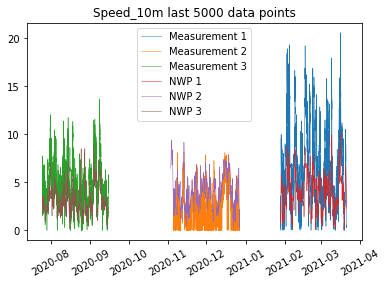

In [151]:
col = 'Speed_10m'
for i in range(6):
    
    df = df_all[i]
    
    plt.plot(df[-5000:]['Date_Time'],df[-5000:][col],linewidth=0.5, label=df.name)
    
    
plt.title(col+' last 5000 data points')
plt.legend()
plt.xticks(rotation=30)
plt.show()

In [162]:
df_inter=[]
for df in df_all:
    name=df.name
    df = df.copy(deep=True)
    
    
    #df = df_all[3]
    #display(df[idx-5:idx+5])
    #idx = df['Date_Time'].diff().ne(pd.to_timedelta(15,unit='m'))[1:].idxmax()
    #print(df["Date_Time"].min())
    #print(df["Date_Time"].max())
    
    df = df.resample('15min', on='Date_Time').mean().reset_index()
    
    #print(df["Date_Time"].min())
    #print(df["Date_Time"].max())
    #display(df[idx-5:idx+5])
    #break

    
    # Sets all na values to 0.
    #df = df.iloc[:,1:].fillna(0) 
    # Sets all na value to the previous value
    #df = df.iloc[:,1:].interpolate(method ='pad', limit_direction ='forward') 
    # Sets all na value to the previous value
    #df = df.iloc[:,1:].interpolate(method ='pad', limit_direction ='backward') 
    # Remove rows containing na
    #df = df.iloc[:,1:].dropna() 
    
    # interpolation. Assumes equidistant data.
    # (consecutive nans are filled from both directions because measurement 1 has na in park power for the first 10 rows)
    # First quadratic to get better fits, then linear because quadratic does not fill if ends of data is nan.
    df.iloc[:,1:] = df.iloc[:,1:].interpolate(method ='quadratic', limit_direction='both') 
    df.iloc[:,1:] = df.iloc[:,1:].interpolate(method ='linear', limit_direction='both') 
    assert(df.isna().sum().sum() == 0)
    
    df.name=name
    df_inter.append(df)
    
    # Because quadratic interpolation can give values outside accepted range
    for label in df.columns:
        if 'speed' in label.lower():
            df[label].clip(lower=0,inplace=True)
        elif 'direction' in label.lower():
            df[label].clip(lower=0,upper=360,inplace=True)
    
    

df_inter[0].drop(columns=['Speed_80m','Direction_80m'], inplace=True)

[]

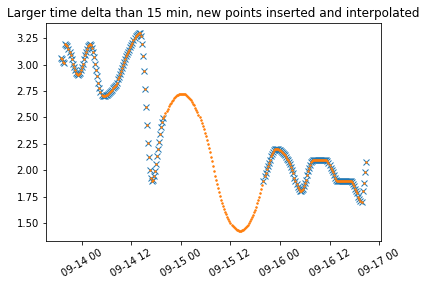

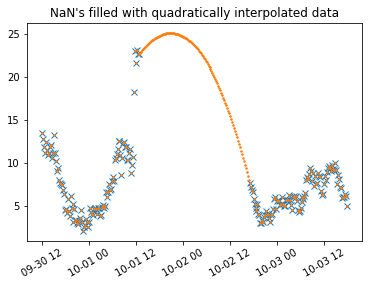

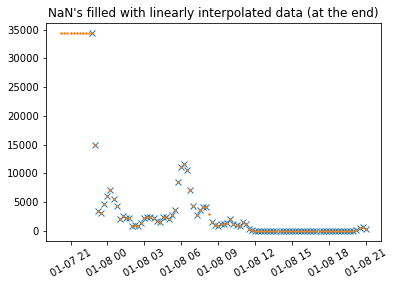

In [150]:
df=df_all[3]
df_new=df_inter[3]

idx = df['Date_Time'].diff().ne(pd.to_timedelta(15,unit='m'))[1:].idxmax()
idx_new = df_new.eq(df.iloc[idx,:]).sum(axis=1).idxmax()

col = 'Speed_10m'
plt.plot(df[idx-100:idx+100]['Date_Time'], df[idx-100:idx+100][col],'x')
plt.plot(df_new[idx-100:idx_new+100]['Date_Time'], df_new[idx-100:idx_new+100][col],'.',markersize=3)
plt.xticks(rotation=30)
plt.title('Larger time delta than 15 min, new points inserted and interpolated')
plt.plot()


df=df_all[0]
df_new=df_inter[0]

idx = df[col][50:].isna().idxmax()
idx_new = df[col][idx:].isna().idxmin()

plt.figure()
plt.plot(df[idx-100:idx_new+100]['Date_Time'], df[idx-100:idx_new+100][col],'x')
plt.plot(df_new[idx-100:idx_new+100]['Date_Time'], df_new[idx-100:idx_new+100][col],'.',markersize=3)
plt.xticks(rotation=30)
plt.title("NaN's filled with quadratically interpolated data")
plt.plot()

col = 'Park Power [KW]'
plt.figure()
plt.plot(df[:100]['Date_Time'], df[:100][col],'x')
plt.plot(df_new[:100]['Date_Time'], df_new[:100][col],'.',markersize=3)
plt.xticks(rotation=30)
plt.title("NaN's filled with linearly interpolated data (at the end)")
plt.plot()
